In [1]:
#spacy
import spacy
from spacy.pipeline import EntityRuler
from spacy.lang.en import English
from spacy.tokens import Doc

In [2]:
#gensim
import gensim
from gensim import corpora

In [3]:
#Visualization
from spacy import displacy
import pyLDAvis.gensim_models
from wordcloud import WordCloud
import plotly.express as px
import matplotlib.pyplot as plt

In [4]:
#Data loading/ Data manipulation
import pandas as pd
import numpy as np
import jsonlines

In [5]:
#nltk
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download(['stopwords','wordnet'])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Arpan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Arpan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [6]:
#warning
import warnings 
warnings.filterwarnings('ignore')

## Resume Dataset

In [7]:
df = pd.read_csv("Resume/Resume.csv")
df = df.reindex(np.random.permutation(df.index))
data = df.copy().iloc[0:200]
data.head()

ID                                         Resume_str  \
2450  24544244           PASSENGER SERVICES OFFICER       Prof...   
249   12635195      Objective    To obtain a position in the i...   
250   32959732           SENIOR DIRECTOR, INFORMATION TECHNOLO...   
1331  11257723           GENERAL LIABILITY CLAIM REPRESENTATIV...   
1881  27637576           CORPORATE ACCOUNTANT           Summar...   

                                            Resume_html  \
2450  <div class="fontsize fontface vmargins hmargin...   
249   <div class="fontsize fontface vmargins hmargin...   
250   <div class="fontsize fontface vmargins hmargin...   
1331  <div class="fontsize fontface vmargins hmargin...   
1881  <div class="fontsize fontface vmargins hmargin...   

                    Category  
2450                AVIATION  
249   INFORMATION-TECHNOLOGY  
250   INFORMATION-TECHNOLOGY  
1331              AUTOMOBILE  
1881              ACCOUNTANT

## Loading spaCy model

In [8]:
nlp = spacy.load("en_core_web_md")
skill_pattern_path = "jz_skill_patterns.jsonl"

## Entity Ruler

In [9]:
ruler = nlp.add_pipe("entity_ruler")
ruler.from_disk(skill_pattern_path)
nlp.analyze_pipes()

{'summary': {'tok2vec': {'assigns': ['doc.tensor'],
   'requires': [],
   'scores': [],
   'retokenizes': False},
  'tagger': {'assigns': ['token.tag'],
   'requires': [],
   'scores': ['tag_acc'],
   'retokenizes': False},
  'parser': {'assigns': ['token.dep',
    'token.head',
    'token.is_sent_start',
    'doc.sents'],
   'requires': [],
   'scores': ['dep_uas',
    'dep_las',
    'dep_las_per_type',
    'sents_p',
    'sents_r',
    'sents_f'],
   'retokenizes': False},
  'attribute_ruler': {'assigns': [],
   'requires': [],
   'scores': [],
   'retokenizes': False},
  'lemmatizer': {'assigns': ['token.lemma'],
   'requires': [],
   'scores': ['lemma_acc'],
   'retokenizes': False},
  'ner': {'assigns': ['doc.ents', 'token.ent_iob', 'token.ent_type'],
   'requires': [],
   'scores': ['ents_f', 'ents_p', 'ents_r', 'ents_per_type'],
   'retokenizes': False},
  'entity_ruler': {'assigns': ['doc.ents', 'token.ent_type', 'token.ent_iob'],
   'requires': [],
   'scores': ['ents_f', 'ent

## Skills

In [10]:
def get_skills(text):
    doc = nlp(text)
    myset = []
    subset = []
    for ent in doc.ents:
        if ent.label_ == "SKILL":
            subset.append(ent.text)
    myset.append(subset)
    return subset

def unique_skills(x):
    return list(set(x))

In [11]:
txt = data.iloc[0][1]

In [12]:
frs = get_skills(txt)

## Cleaning Resume Text

In [13]:
clean = []
for i in range(data.shape[0]):
    review = re.sub(
        '(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?"',
        " ",
        data["Resume_str"].iloc[i],
    )
    review = review.lower()
    review = review.split()
    lm = WordNetLemmatizer()
    review = [
        lm.lemmatize(word)
        for word in review
        if not word in set(stopwords.words("english"))
    ]
    review = " ".join(review)
    clean.append(review)

## Applying functions


In [14]:
data["Clean_Resume"] = clean
data["skills"] = data["Clean_Resume"].str.lower().apply(get_skills)
data["skills"] = data["skills"].apply(unique_skills)

In [15]:
data.head(50)

ID                                         Resume_str  \
2450  24544244           PASSENGER SERVICES OFFICER       Prof...   
249   12635195      Objective    To obtain a position in the i...   
250   32959732           SENIOR DIRECTOR, INFORMATION TECHNOLO...   
1331  11257723           GENERAL LIABILITY CLAIM REPRESENTATIV...   
1881  27637576           CORPORATE ACCOUNTANT           Summar...   
1757  39835894           ENGINEERING PROJECT MANAGER         S...   
736   12613221           SLEEP TECHNOLOGIST, RPSGT       Summa...   
1115  93349646           CONSULTANT         Core Qualification...   
814   24251588           CERTIFIED FITNESS TRAINER           P...   
1226  16509761           DIGITAL MEDIA INTERN       Summary   ...   
915   37201447           ADULT EDUCATION INSTRUCTOR         Su...   
39    19616406           HR DIRECTOR           Professional Su...   
1338  22732234           CUSTOMER SERVICE REPRESENTATIVE      ...   
2433  96457008           OPERATOR       Summary    ATP & ESS T...   
466   20765795           PATIENT ADVOCATE           Summary   ...   
1380  21611637           STORE CHEF           Summary    Resta...   
1215  10984392           PROCESS CONSULTANT           Professi...   
1636  29764492             DESIGN DIRECTOR / SENIOR DESIGNER  ...   
446   73448369           PATIENT ADVOCATE           Profession...   
2224  31025785           SOHO PROPERTIES, SUMMER ANALYST      ...   
510   19108760           PATIENT ADVOCATE /CLINICAL CARE COORD...   
147   10748989           LIGHTING DESIGNER       Professional ...   
2255  28989677           SENIOR COMPLIANCE OFFICER         Sum...   
2261  31710562           CORPORATE CONTROLLER           Summar...   
894   34151183           CASHIER           Career Overview    ...   
2335  39064638           SOUS CHEF/LINE COOK       Summary    ...   
753   98309114           DIRECTOR, QUALITY IMPROVEMENT NETWORK...   
1668  21570485           COORDINATING MANAGER       Summary   ...   
1709  25608963           ENGINEERING TECHNICIAN           Summ...   
2115  28531493           MANAGER, INDUSTRY ANALYST RELATIONS  ...   
1947  15564893           CONSTRUCTION HELPER       Summary    ...   
2     33176873           HR DIRECTOR       Summary      Over 2...   
1627  30344127           SENIOR MATERIALS ANALYST       Summar...   
1148  32637306           CONSULTANT       Summary     A dynami...   
1261  20330739           EXEC DIRECTOR OF SALES, CONSULTANT, S...   
843   89858892          AM         RECEIVING MANAGER       Sum...   
710   13352113           LICENSED UNITED HEALTHCARE INSURANCE ...   
758   85417107           HIRING MANAGER/RECRUITING MANAGER    ...   
755   45907524           ADMINISTRATIVE ASSISTANT           Ex...   
1501  18975686           FINANCE MANAGER       Summary    Outg...   
88    13376919           REGIONAL HR DEPUTY MANAGER       Summ...   
2075  30642458           DIRECTOR OF PUBLIC RELATIONS / ASSOCI...   
2090  14128006      ABOUT    Creative communications professio...   
2398  94137171           PLANT FULFILLMENT LEADER         Summ...   
798   10816645           GROUP FITNESS COORDINATOR       Profe...   
162   11958994           SALON DESIGNER           Career Overv...   
588   32531824           BUSINESS DEVELOPMENT ASSOCIATE       ...   
679   51777546           HEALTHCARE RECRUITER         Highligh...   
1831  14491649           ACCOUNTANT       Summary     Flexible...   
2466  38663892           MANAGEMENT AND PROGRAM ANALYSIS      ...   

                                            Resume_html  \
2450  <div class="fontsize fontface vmargins hmargin...   
249   <div class="fontsize fontface vmargins hmargin...   
250   <div class="fontsize fontface vmargins hmargin...   
1331  <div class="fontsize fontface vmargins hmargin...   
1881  <div class="fontsize fontface vmargins hmargin...   
1757  <div class="fontsize fontface vmargins hmargin...   
736   <div class="fontsize fontface vmargins hmargin...   
1115  <div class="fo

## Visualization

In [16]:
fig = px.histogram(
    data, x="Category", title="Distribution of Jobs Categories"
).update_xaxes(categoryorder="total descending")
fig.show()

In [17]:
# data.iloc[0][1]

In [18]:
# for d in data['Resume_str']:
#     segments =  d.split('\n\n')
#     for seg in segments:
#         seg = seg.strip()
#         seg = seg.replace("\n"," ")
#         results = test_model(nlp3, segment)
        

In [19]:
# data['Resume_str'].iloc[1].split('\n\n')

## Skills

In [20]:
Job_Cat = data["Category"].unique()
Job_Cat = np.append(Job_Cat, "ALL")

In [21]:
Total_skills = []
for Job_Category in Job_Cat:
    if Job_Category != "ALL":
        matched_person = data[data["Category"] == Job_Category]["skills"]
        for skills in matched_person:
            for skill in skills:
                Total_skills.append(skill)
    else:
        all_skill_person = data["skills"]
        for skills in all_skill_person:
            for skill in skills:
                Total_skills.append(skill)

    fig = px.histogram(
                        x=Total_skills,
                        labels={"x": "Skills"},
                        title=f"{Job_Category} Distribution of Skills",
                       ).update_xaxes(categoryorder="total descending")
    fig.show()

## Most used words

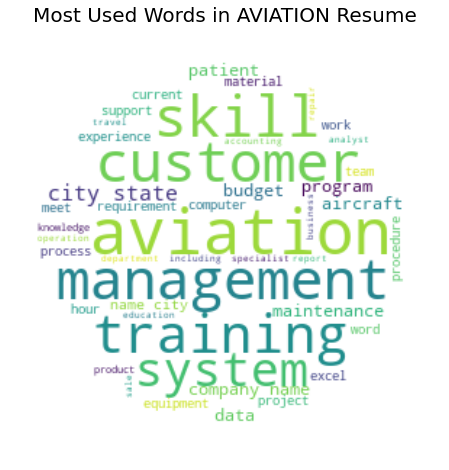

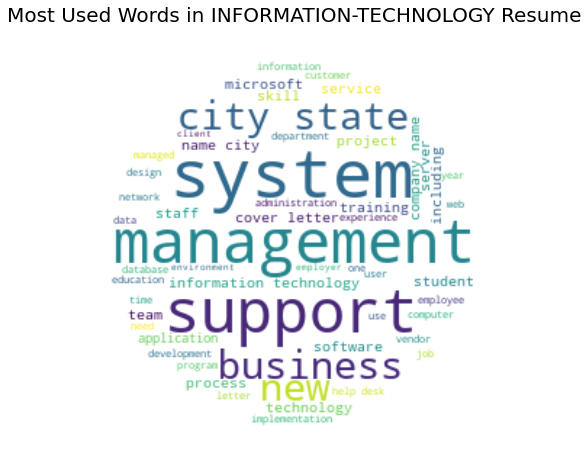

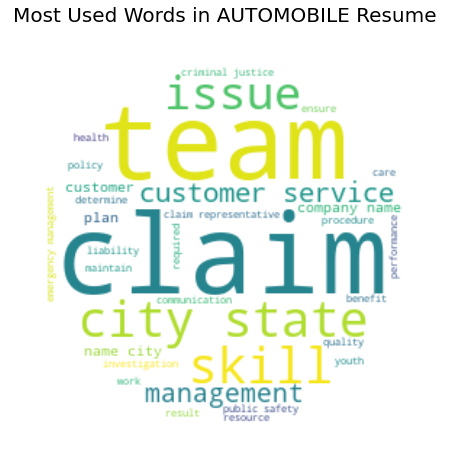

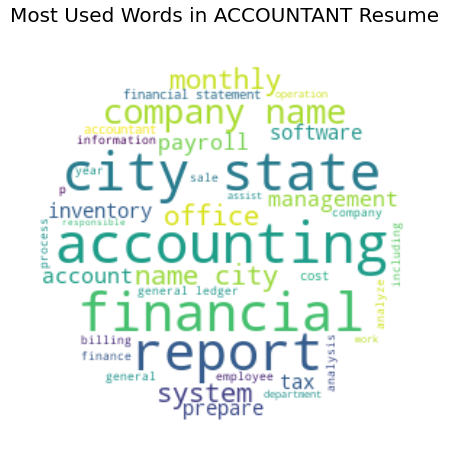

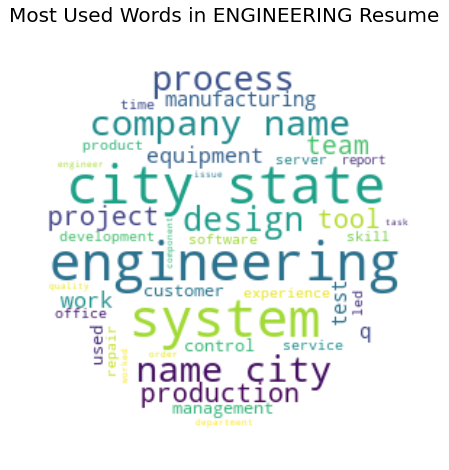

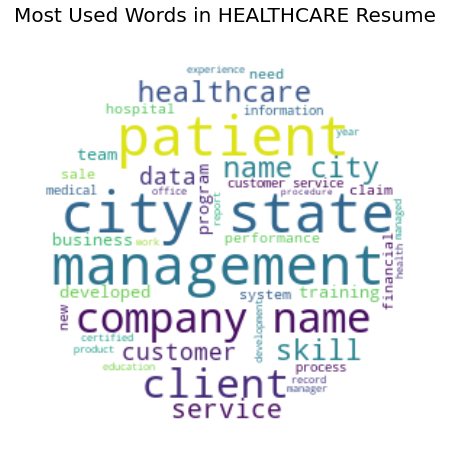

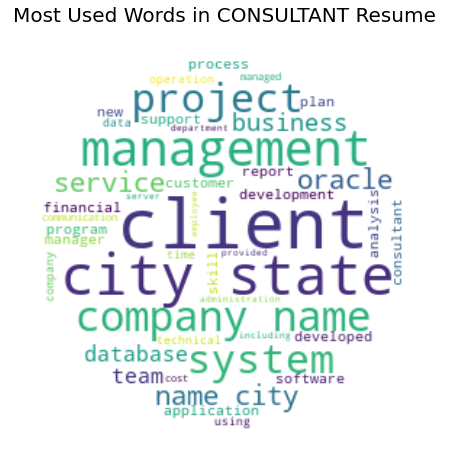

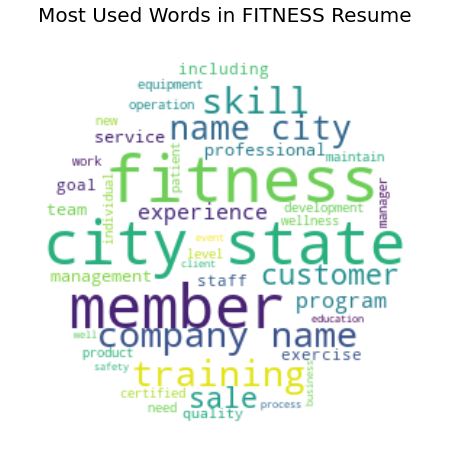

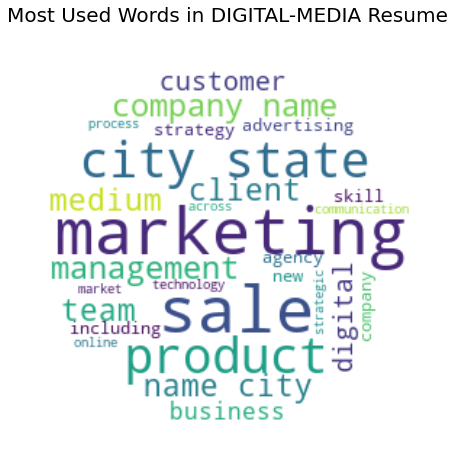

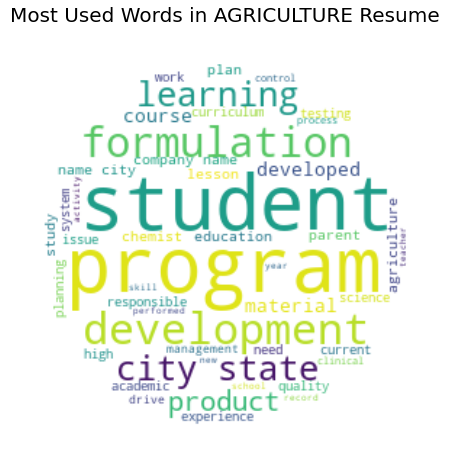

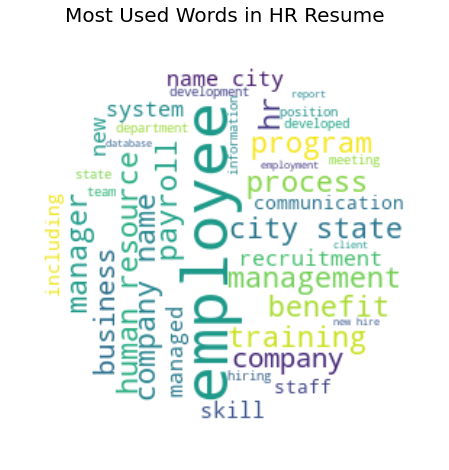

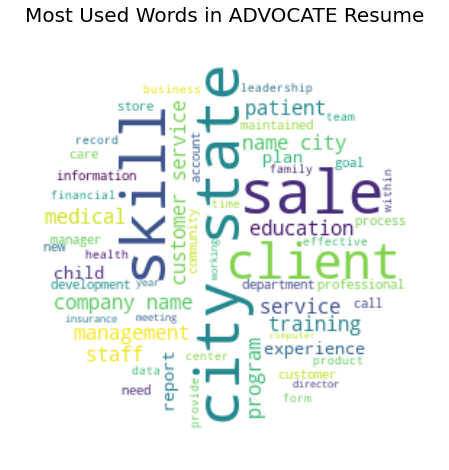

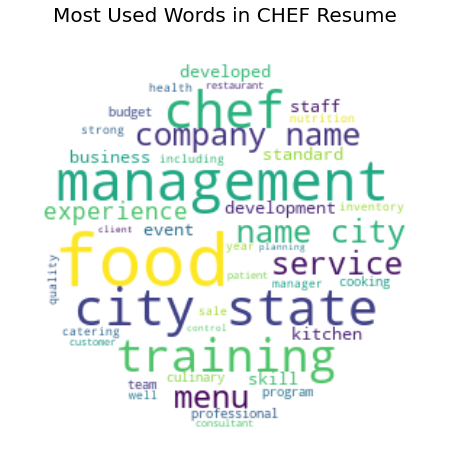

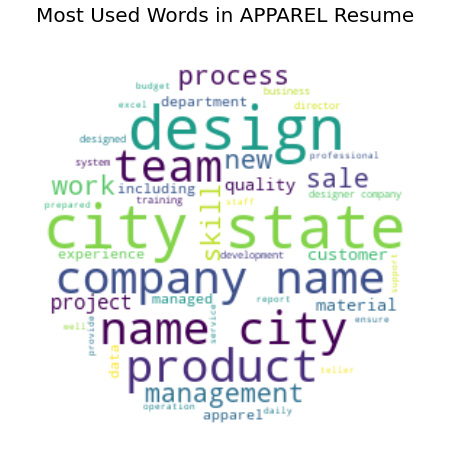

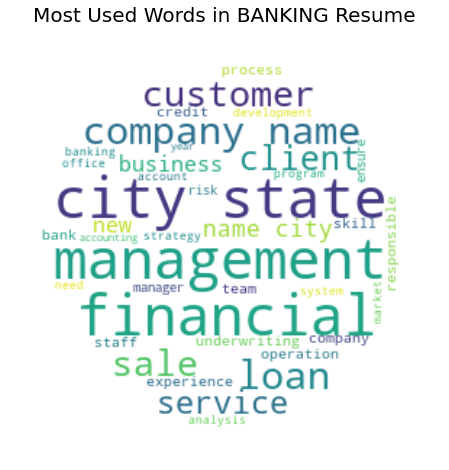

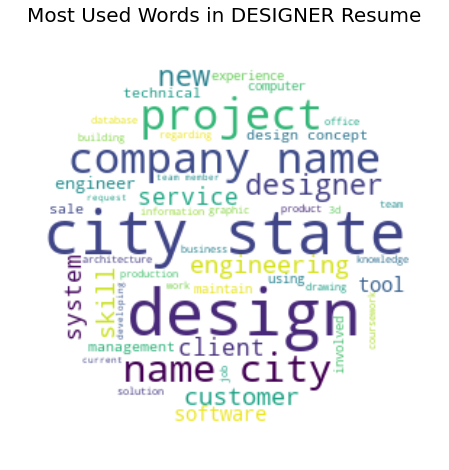

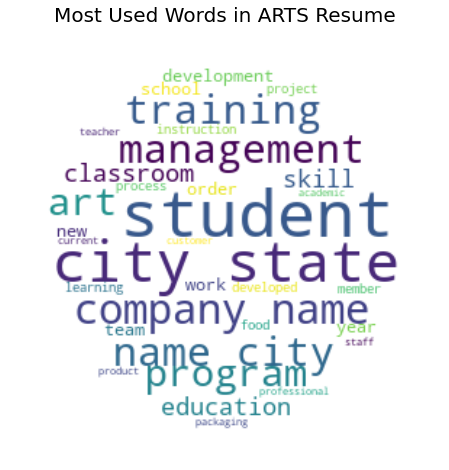

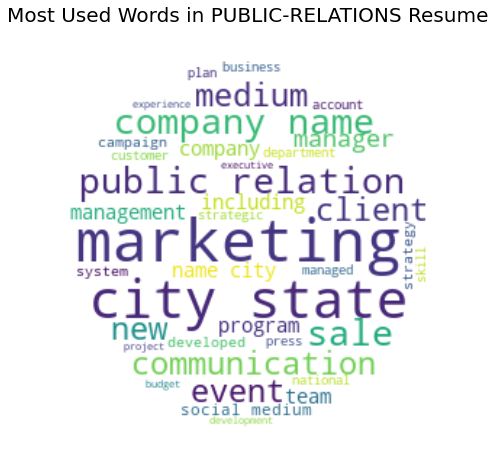

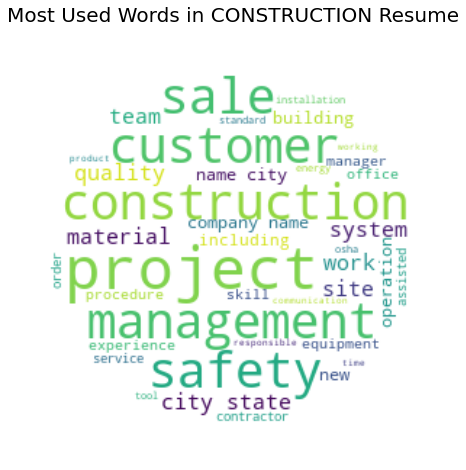

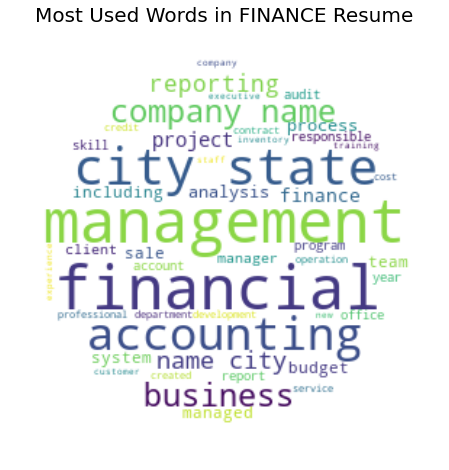

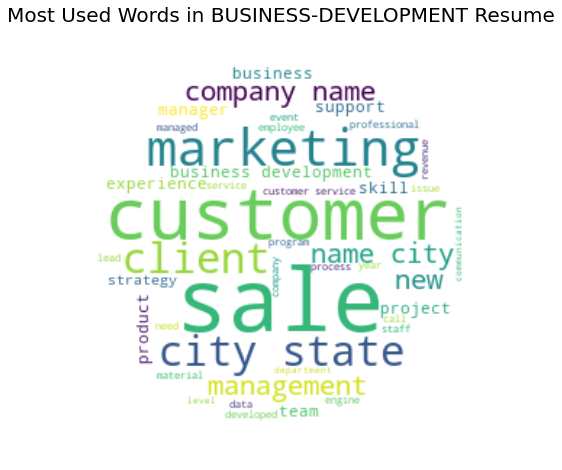

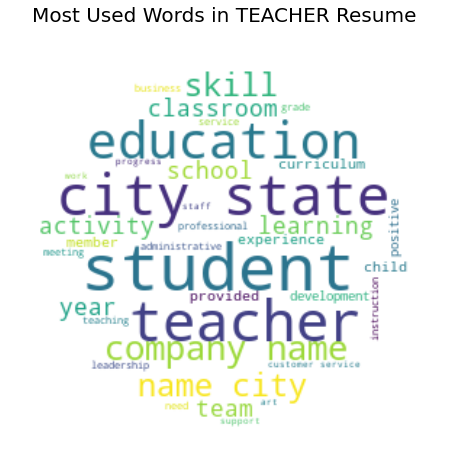

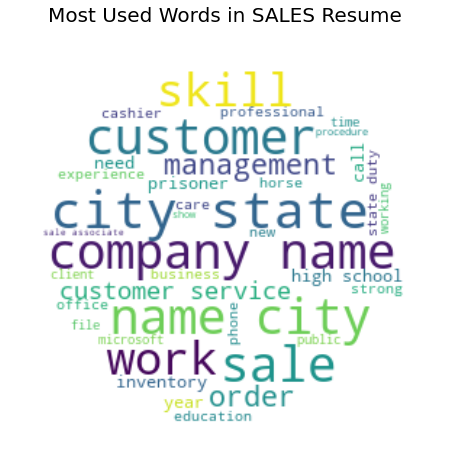

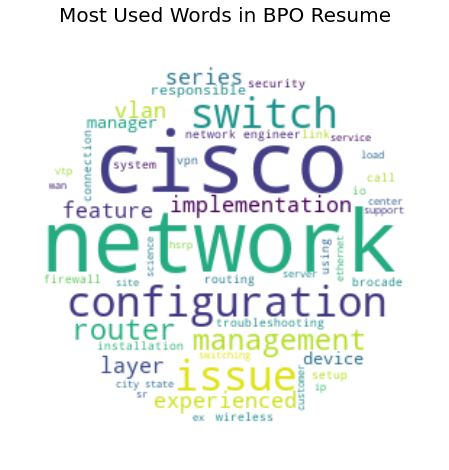

In [22]:
for Job_Category in Job_Cat:
    text = ""
    for resume_text in data[data["Category"] == Job_Category]["Clean_Resume"].values:
        text += resume_text + " "
    if len(text)>0:
        plt.figure(figsize=(8, 8))

        x, y = np.ogrid[:300, :300]

        mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
        mask = 255 * mask.astype(int)

        wc = WordCloud(
                        width=800,
                        height=800,
                        background_color="white",
                        min_font_size=6,
                        repeat=True,
                        mask=mask,
                      )

        wc.generate(text)

        plt.axis("off")
        plt.imshow(wc, interpolation="bilinear")
        plt.title(f"Most Used Words in {Job_Category} Resume", fontsize=20)

In [23]:
data[data["Category"] ==  'ENGINEERING']["Clean_Resume"].values

array(['engineering project manager summary eleven year experience analog rf mixed signal layout design module chip level 180nm 65nm 45nm 28nm tsmc 14ff samsung foundry 10nm intel experienced planning tracking executing task meet desired deadline skill aware analog layout fundamental like device matching shielding isolation esd latchup antenna em dfm physical verification layout using tool like k2ver hercules caliber assura used auto router tool like icct chip assembly router aprisa vsr various block reduce manual effort used post layout parasitic extraction tool used nucleus ti internal tool esd latchup spire ti internal tool emir analysis voltrace ti internal tool high voltage check used data management tool like synchronicity ic manage relevant experience current company aricent inc client intel usa currently trained genesys tool 10nm intel flow working block like ldo begin client qualcomm pvt ltd india wtr rx tx synth 14ff samsung foundry duration project 6 month managed team 6 wor

In [55]:
len(text)

0

## Entity Recognition

In [24]:
sent = nlp(data["Resume_str"].iloc[0])
displacy.render(sent, style="ent", jupyter=True)

## Dependency Parsing

In [27]:
displacy.render(sent[0:100], style="dep", jupyter=True, options={"distance": 150,})

In [29]:
# options=[{"ents": "Job-Category", "colors": "#ff3232"},{"ents": "SKILL", "colors": "#56c426"}]
colors = {
    "Job-Category": "linear-gradient(90deg, #aa9cfc, #fc9ce7)",
    "SKILL": "linear-gradient(90deg, #9BE15D, #00E3AE)",
    "ORG": "#ffd966",
    "PERSON": "#e06666",
    "GPE": "#9fc5e8",
    "DATE": "#c27ba0",
    "ORDINAL": "#674ea7",
    "PRODUCT": "#f9cb9c",
}
options = {
    "ents": [
        "Job-Category",
        "SKILL",
        "ORG",
        "PERSON",
        "GPE",
        "DATE",
        "ORDINAL",
        "PRODUCT",
    ],
    "colors": colors,
}
sent = nlp(data["Resume_str"].iloc[5])
displacy.render(sent, style="ent", jupyter=True, options=options)

In [30]:
input_resume = df.iloc[500,1]
sent2 = nlp(input_resume)
displacy.render(sent2, style="ent", jupyter=True, options=options)

In [31]:
displacy.render(sent[0:10], style="dep", jupyter=True, options={"distance": 90})